In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
nh=pd.read_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\NH거래고객데이터.csv",encoding='cp949')

In [86]:
nh

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c076,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [87]:
from matplotlib import rc
%matplotlib inline
rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

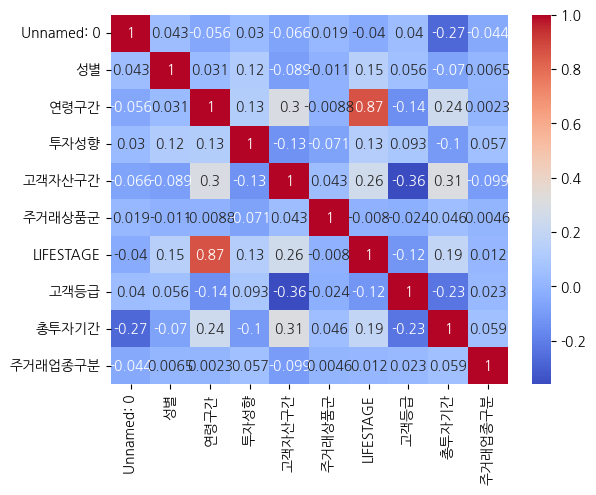

In [88]:
corr=nh.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [89]:
nh1 = nh.drop(['연령구간', '계좌','Unnamed: 0'], axis=1)

In [90]:
# 상관계수 행렬 계산
corr_matrix = nh1.corr()

# 대각선을 제외한 상관계수의 최대값과 최소값 계산
max_corr = np.max(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
min_corr = np.min(corr_matrix.values[np.triu_indices(len(corr_matrix), k=1)])
print(f'최대값 : {max_corr}, 최소값 : {min_corr}')

# 가장 큰 값과 가장 작은 값의 차이 계산
diff_corr = np.abs(max_corr - min_corr)

# 차이가 0.5보다 크면 비선형 데이터, 작으면 선형 데이터로 간주
if diff_corr > 0.5:
    print("비선형 데이터입니다.")
else:
    print("선형 데이터입니다.")

최대값 : 0.30595515003699086, 최소값 : -0.3601333892087158
비선형 데이터입니다.


<AxesSubplot:>

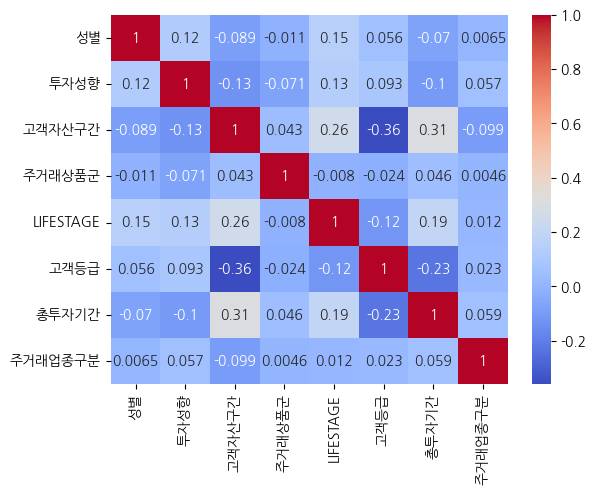

In [91]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

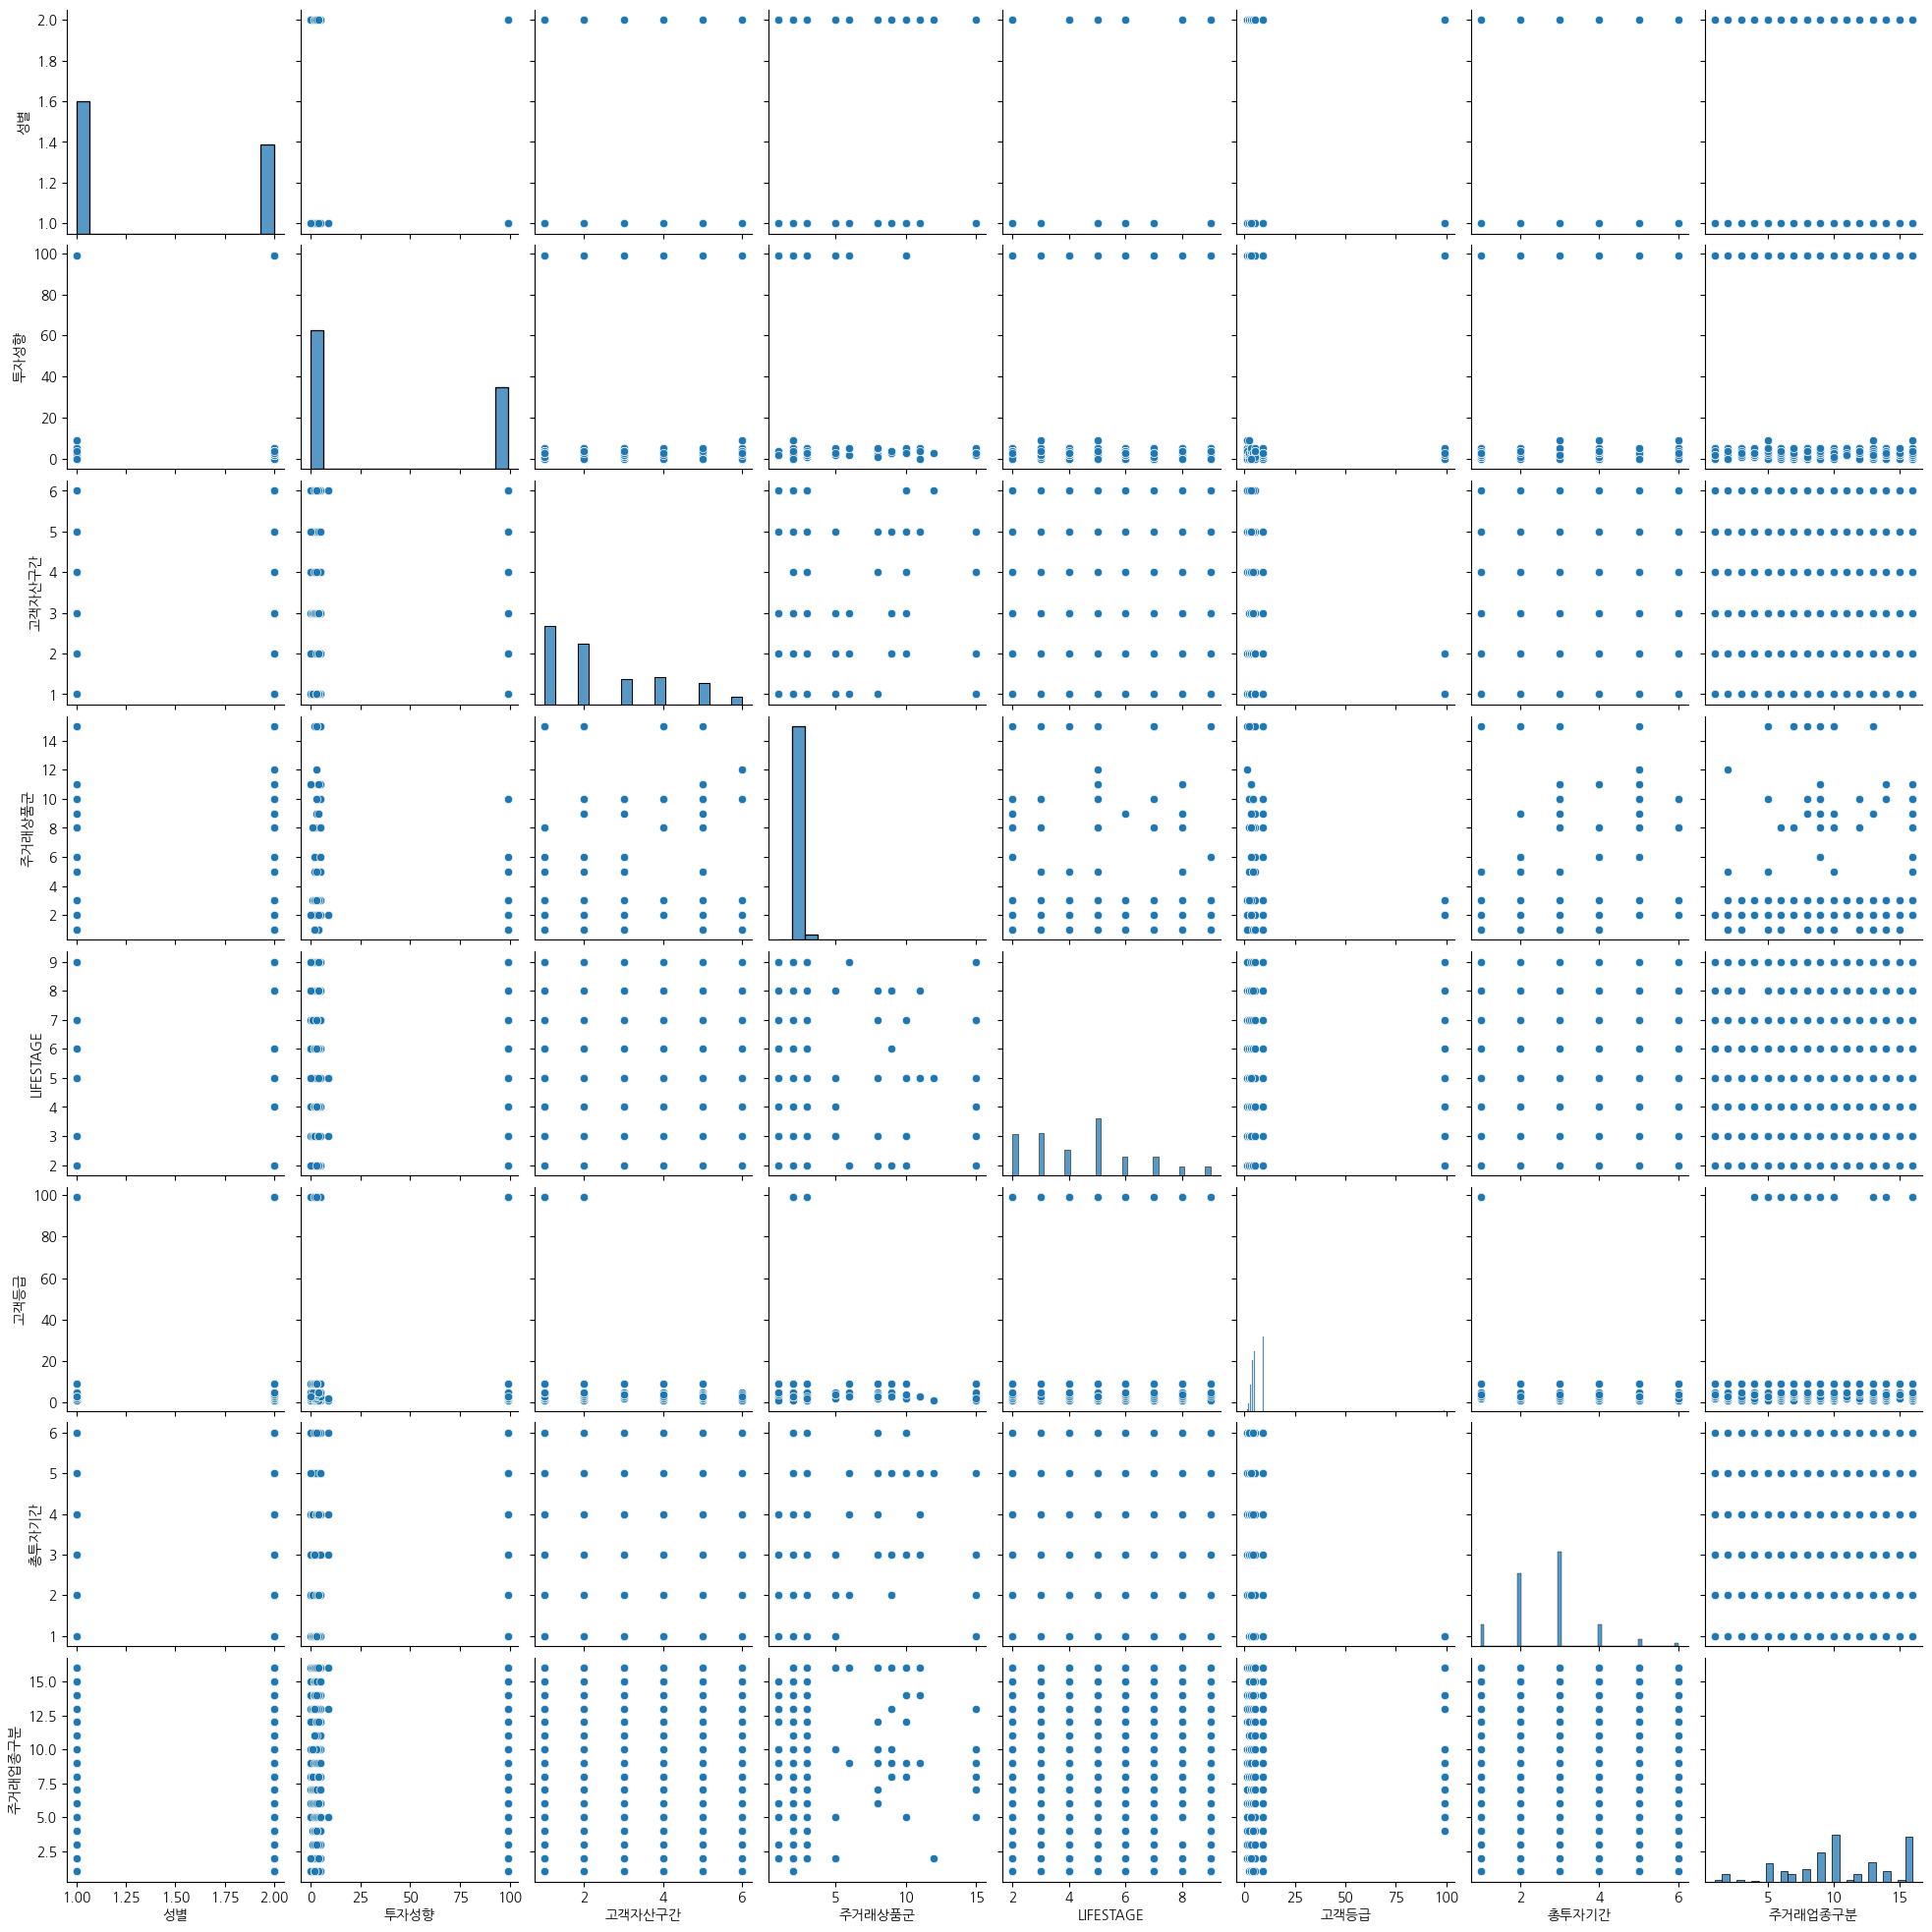

In [92]:
sns.pairplot(nh1)

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(nh1)
plt.title("이상치확인하기",fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x800 with 0 Axes>

In [94]:
nh1

,성별,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,1,99,1,2,3,3,6,16
1,1,4,4,2,5,2,6,1
2,2,4,3,2,5,5,6,9
3,2,4,4,8,5,3,6,16
4,1,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...
9995,1,4,2,2,9,5,2,16
9996,2,3,1,2,2,9,1,16
9997,2,4,2,2,5,5,2,16
9998,1,99,5,2,5,3,2,5


In [ ]:
#주거래상품군 총투자기간 고객등급 lifestage

In [104]:
#이상치제거 표준화스케일링
#이상치제거안하고 로버스 스케일링

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [122]:
def remove_outliers(df, column_name):
    '''
    이 함수는 이상치의 개수를 출력하면서 
    이상치를 제거한 데이터프레임을 반환하는 함수입니다.
    '''
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    removed_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    # 이상치 세기
    num_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].shape[0]
    print(f"열이름: {column_name}, 이상치 개수: {num_outliers}")
    
    return removed_df

In [124]:
columns = ["주거래상품군", "LIFESTAGE", "고객등급", "총투자기간"]
for i in columns:
    sales = remove_outliers(df, i)

열이름: 주거래상품군, 이상치 개수: 341
열이름: LIFESTAGE, 이상치 개수: 379
열이름: 고객등급, 이상치 개수: 37
열이름: 총투자기간, 이상치 개수: 460


In [133]:
sales

,성별,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
42,1,3,2,2,5,5,4,1
44,2,3,4,3,4,3,4,16
46,2,99,6,2,8,2,4,16
47,2,99,1,2,5,9,3,12
48,1,3,3,2,5,4,4,11
...,...,...,...,...,...,...,...,...
9994,1,3,1,2,7,9,2,16
9995,1,4,2,2,9,5,2,16
9996,2,3,1,2,2,9,1,16
9997,2,4,2,2,5,5,2,16


In [136]:
sales.drop(['주거래상품군'],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10616\3348224616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.drop(['주거래상품군'],axis=1,inplace=True)


In [137]:
from sklearn.ensemble import RandomForestClassifier

X=sales.drop('총투자기간',axis=1)
y=sales['총투자기간']


forest=RandomForestClassifier()
forest.fit(X,y)
importances=forest.feature_importances_

std=np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices=np.argsort(importances)[::-1]


# 피처 랭킹 출력
print("Feature ranking")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f+1,X.columns[indices][f],importances[indices[f]]))

Feature ranking
1. feature 주거래업종구분 (0.387)
2. feature LIFESTAGE (0.178)
3. feature 투자성향 (0.161)
4. feature 고객자산구간 (0.128)
5. feature 고객등급 (0.111)
6. feature 성별 (0.035)


In [138]:
sales.drop(['성별'],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10616\2077327757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.drop(['성별'],axis=1,inplace=True)


In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()
df_scaled = sc.fit_transform(sales)
#pd.DataFrame(df_scaled)
#df_sc_sp = pd.DataFrame(df_scaled, columns = df_sp.columns)

In [155]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=1107)
X_p=pca.fit_transform(df_scaled)

In [156]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.286112
1    0.479757
dtype: float64

In [157]:
# 클러스터 갯수를 1부터 10까지 변화시키면서 왜곡의 크기 변화를 그래프로 시각화
# 3, 4, 5중 하나
from sklearn.cluster import KMeans
k_list = range(2,11)
inertias = []
for k in k_list:
    kmeans= KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_p)
    inertias.append(kmeans.inertia_)
print(f'inertia list:{inertias}')

inertia list:[18019.560253652846, 12324.895050815809, 9745.244990334175, 7316.947524683013, 5859.330267052617, 5034.468207413507, 4280.787207588158, 3824.3526925451324, 3420.4904019813875]


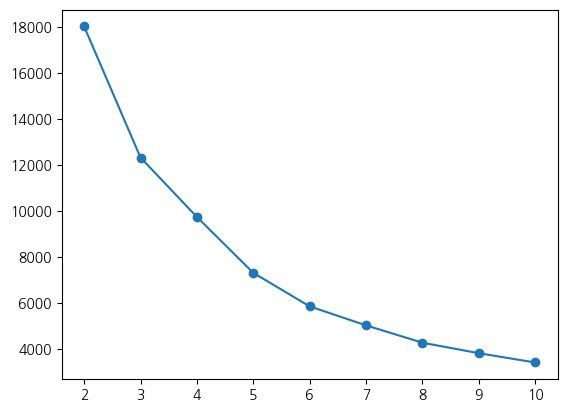

In [158]:
plt.plot(k_list, inertias, marker='o')
plt.show()

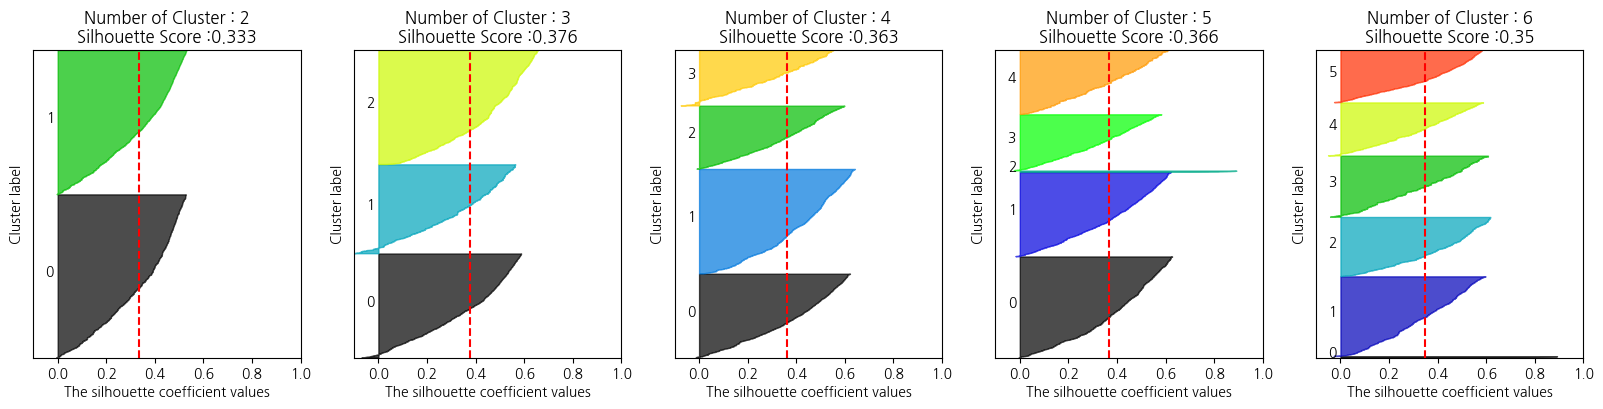

In [161]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6],X_p )

In [162]:
kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(X_p)

In [184]:
from matplotlib import cm

In [185]:
def get_clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

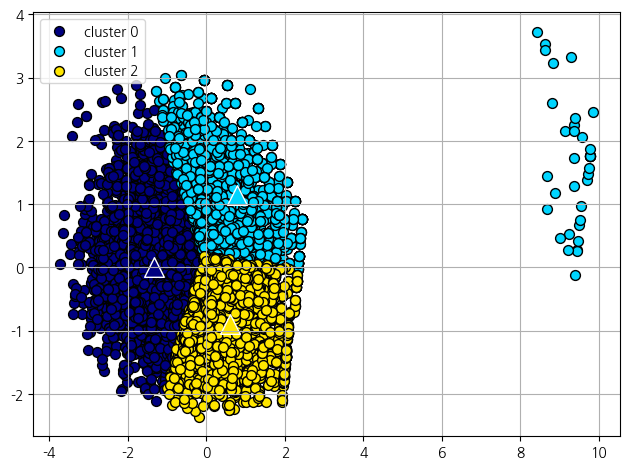

In [186]:
get_clusterScatter(3, X_p)